# Multiple Linear Regression
## Bike Sharing Demand Prediction

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import required packages and start with reading the dataset 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
## Load bike sharing data and view 1st 5 rows from the dataframe
bikeDF = pd.read_csv('day.csv')
bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## Check the shape of the dataframe
bikeDF.shape

(730, 16)

In [4]:
## Check descriptive information of the dataframe
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [5]:
## Generate descriptive statistics of the dataframe
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
## dropping columns that are irrelevant for the model and viewing 1st 5 rows of the dataframe

## instant: record index
## dteday : date of bike sharin
## casual: count of casual users
## registered: count of registered users
 
bikeDF.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#Print number of unique values in all columns
bikeDF.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [8]:
##Check unique values in all the cateorical variables

catVars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(catVars)):
    print("The uniques Value for {0} : {1}".format(catVars[i], bikeDF[catVars[i]].unique()))

The uniques Value for season : [1 2 3 4]
The uniques Value for yr : [0 1]
The uniques Value for mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
The uniques Value for holiday : [0 1]
The uniques Value for weekday : [6 0 1 2 3 4 5]
The uniques Value for workingday : [0 1]
The uniques Value for weathersit : [2 1 3]


In [9]:
##Correlation of all columns in the dataframe
bikeDF.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


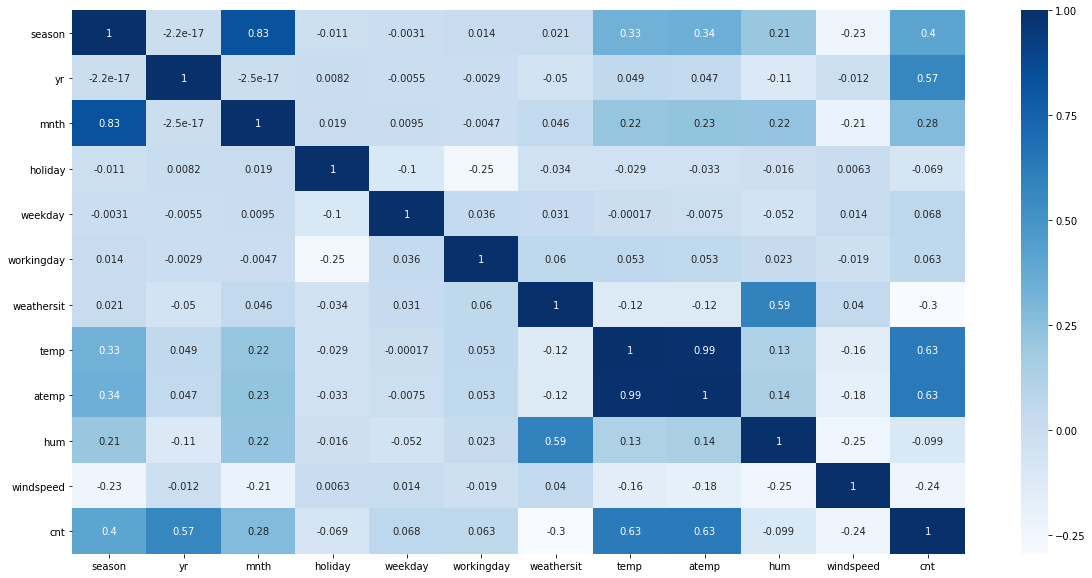

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bikeDF.corr(), annot = True, cmap="Blues")
plt.show()

#### Inference from above heat map
- `cnt` has good correlation with `yr`, `temp` and `atemp` whereas negative correlation with `holiday`, `weathersit`, `hum` and `windspeed`
- `temp` has high correlation with `atemp`
- `season` has high correlation with `mnth`
- `hum` has high correlation with `weathersit`

## Step:2 - Visualizing the Data
#### Visualzing the plots of Numeric Variables
#### Plot the pairplot using seaborn

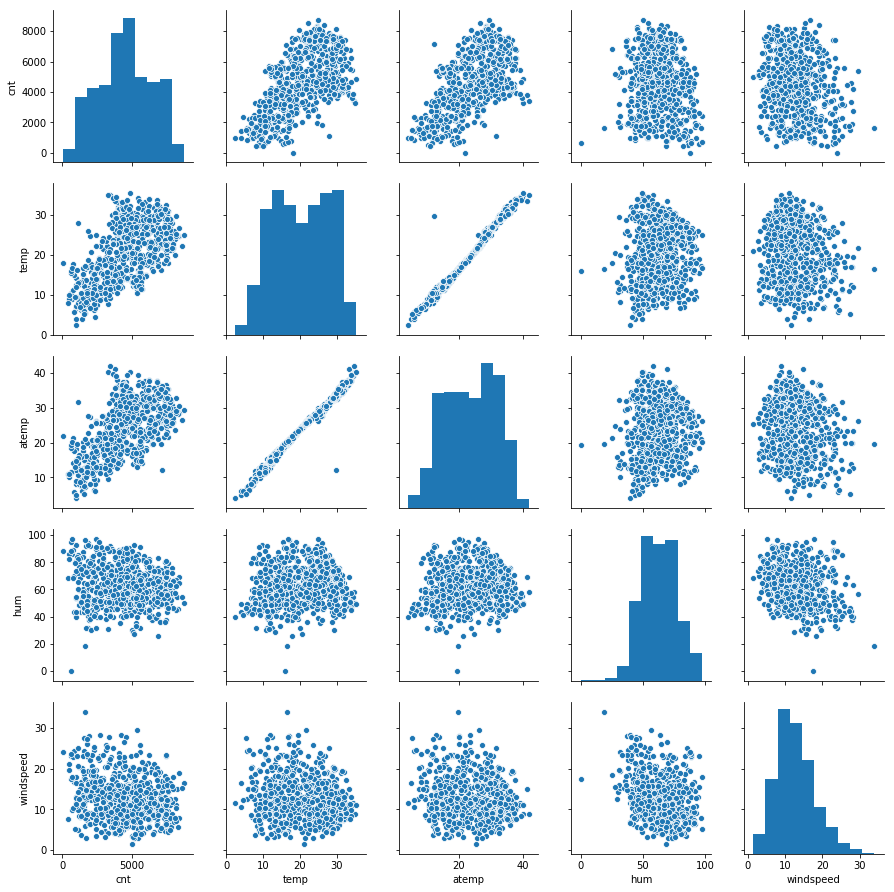

In [11]:
sns.pairplot(data=bikeDF,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Insight
Using the pair plot, we could see there is a linear relation between `temp` and `atemp` variable with the predictor `cnt`.

## Step 3: Data Preparation

In [12]:
### Converting some numeric values to categorical data
import calendar
bikeDF['mnth'] = bikeDF['mnth'].apply(lambda x: calendar.month_abbr[x])

In [13]:
## maping seasons
bikeDF.season = bikeDF.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [14]:
## mapping weathersit
bikeDF.weathersit = bikeDF.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [15]:
## mapping weekday
bikeDF.weekday = bikeDF.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [16]:
# Check the dataframe now

bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


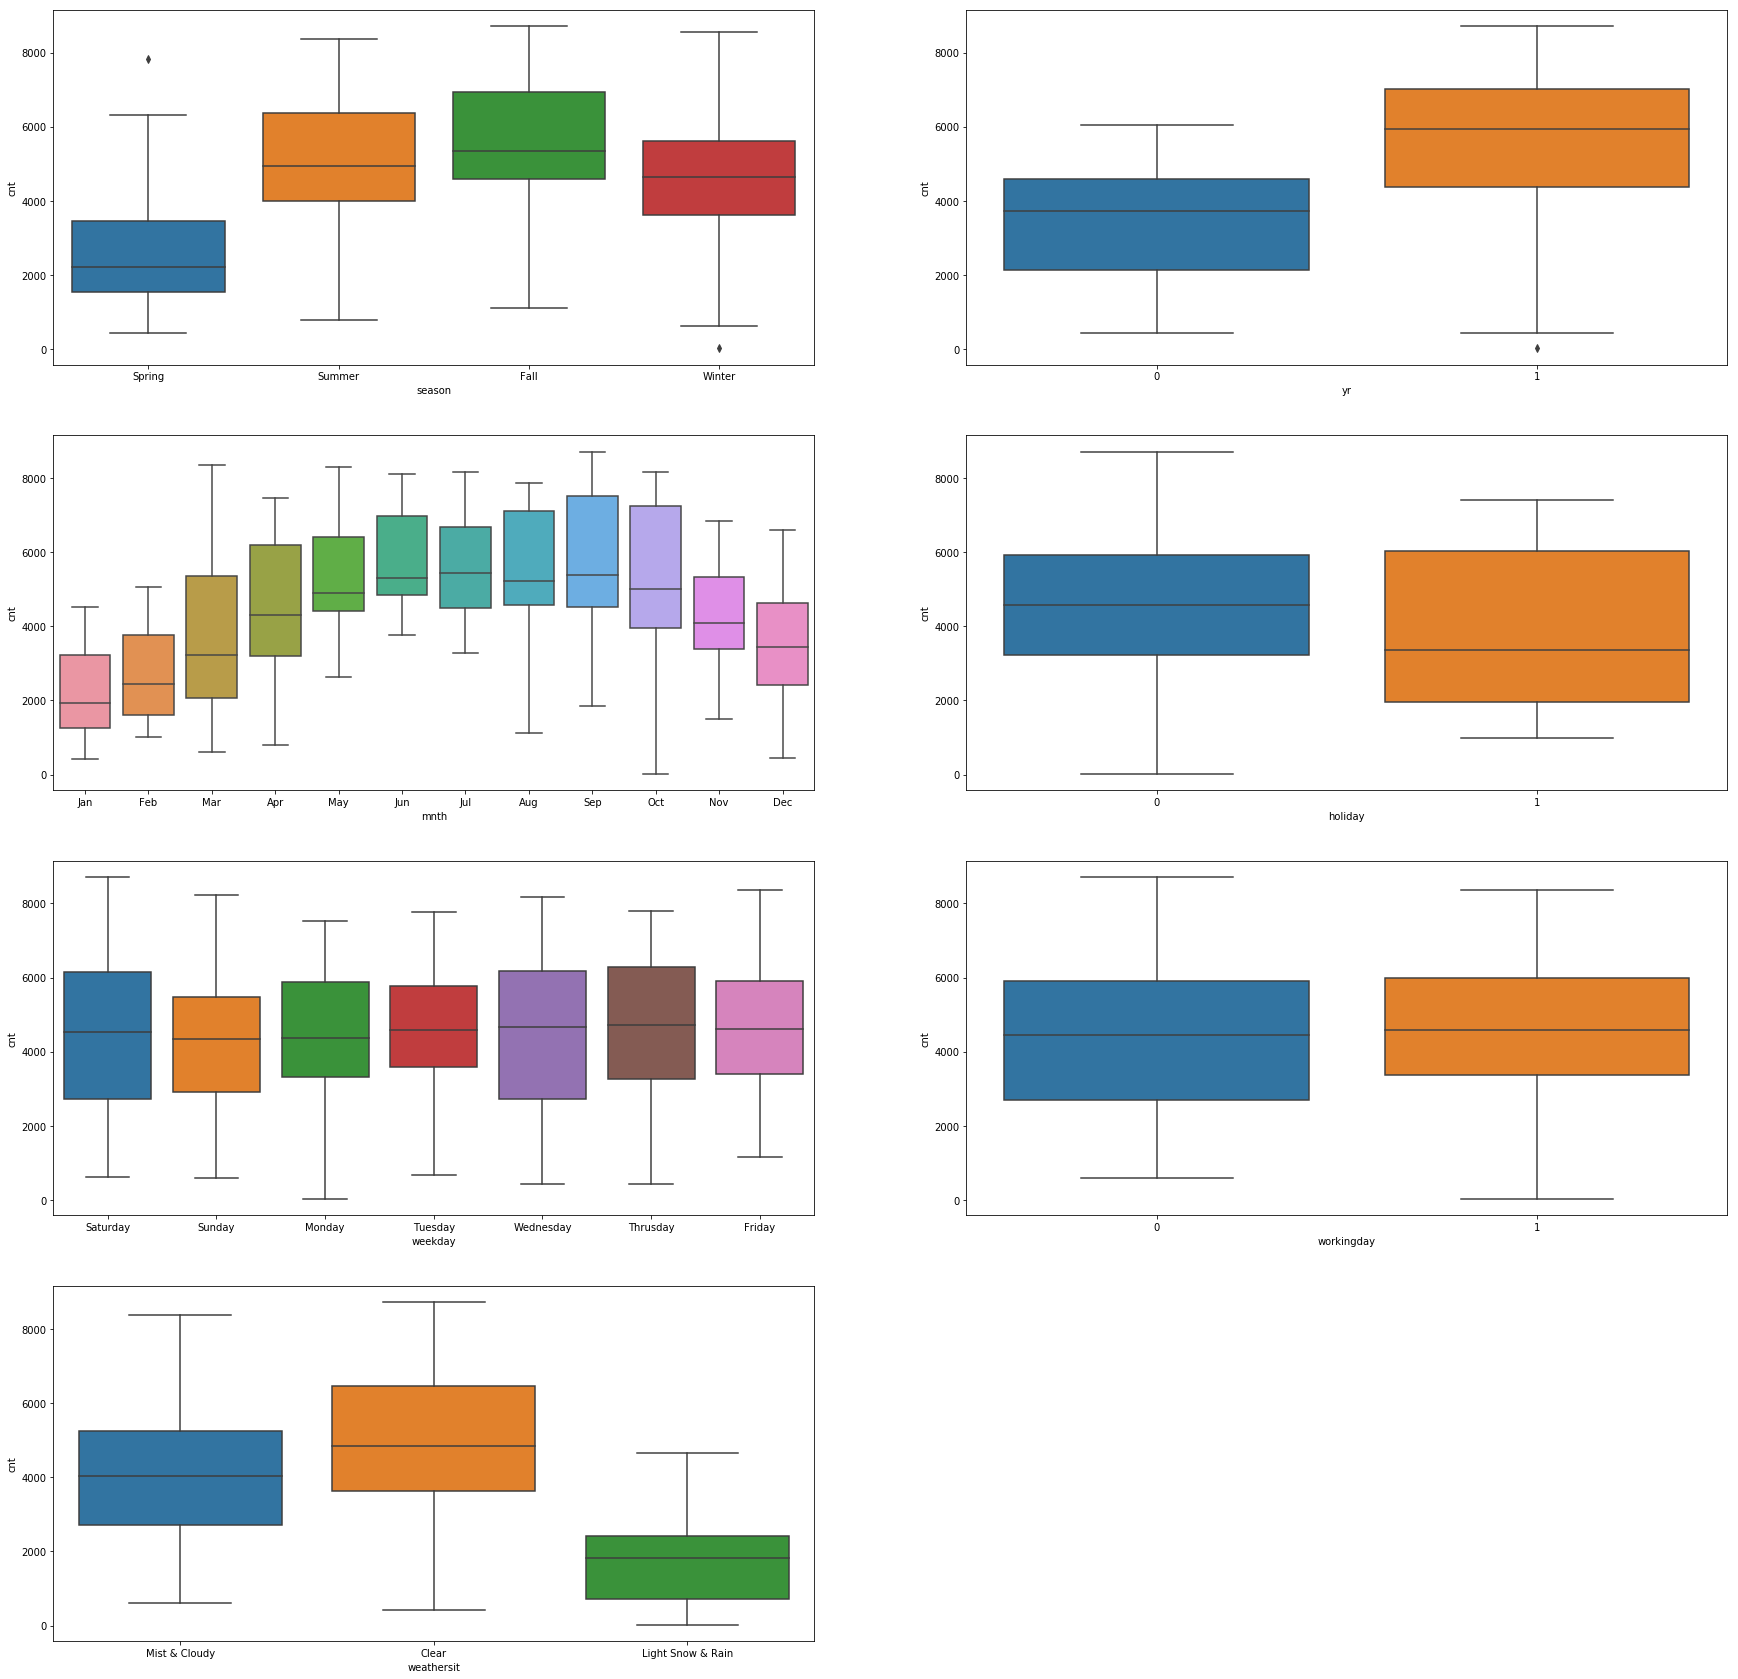

In [17]:
## Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
## to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(30, 30))

catVars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(catVars)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=catVars[i], y='cnt', data=bikeDF)

### Insight
- The count of bike sharing is `least` for `spring`
- The number of bike shares incresed in `2019`
- The cnt has zero values for weather situation - `Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog`(cat no 4)
- The cnt values increases in `summer` months
- The cnt values ars less during `holidays`

In [18]:
## creating dummy variables for season, mnth, weathersit  and weekday
## 'drop_first=True' would drop one of the dummy feature which can be implied with rest
dummy = bikeDF[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

In [19]:
## adding dummy variables to original dataset
bikeDF = pd.concat([dummy,bikeDF],axis = 1)

In [20]:
# Now let's see the head of our dataframe.
bikeDF.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
## dropping columns for which dummy variables were created
bikeDF.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [22]:
##View 1st 5 rows from the dataframe after concatenate and drop
bikeDF.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
## View shape from the dataframe
bikeDF.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [24]:
## We will use train_test_split method from sklearn package for this

train, test = train_test_split(bikeDF, train_size = 0.7, test_size = 0.3, random_state = 25)

## Step 5 :Rescaling the Features

In [25]:
## Initializing MinMaxScaler class
scaler = MinMaxScaler()

In [26]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])


In [27]:
## View scaled train dataframe
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
625,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0.699946,0.628291,0.897172,0.829755,0.466061
698,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.268136,0.303249,0.667952,0.042547,0.649563
134,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.619121,0.589120,0.891602,0.291272,0.521284
528,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.743127,0.690349,0.598543,0.792100,0.851243
722,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0.179078,0.215699,0.813680,0.091918,0.103313


In [28]:
## Generate descriptive statistics of the dataframe
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.250980,0.231373,0.262745,0.082353,0.094118,0.074510,0.084314,0.080392,0.080392,0.088235,...,0.037255,0.349020,0.496078,0.025490,0.711765,0.522582,0.498818,0.651564,0.387718,0.507878
std,0.434003,0.422124,0.440557,0.275172,0.292279,0.262857,0.278131,0.272166,0.272166,0.283915,...,0.189572,0.477128,0.500476,0.157763,0.453386,0.244706,0.221126,0.145399,0.203228,0.225640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.304951,0.304082,0.544773,0.240540,0.333439
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.523348,0.510387,0.655313,0.359232,0.513461
75%,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.738975,0.683760,0.750857,0.506967,0.673234
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


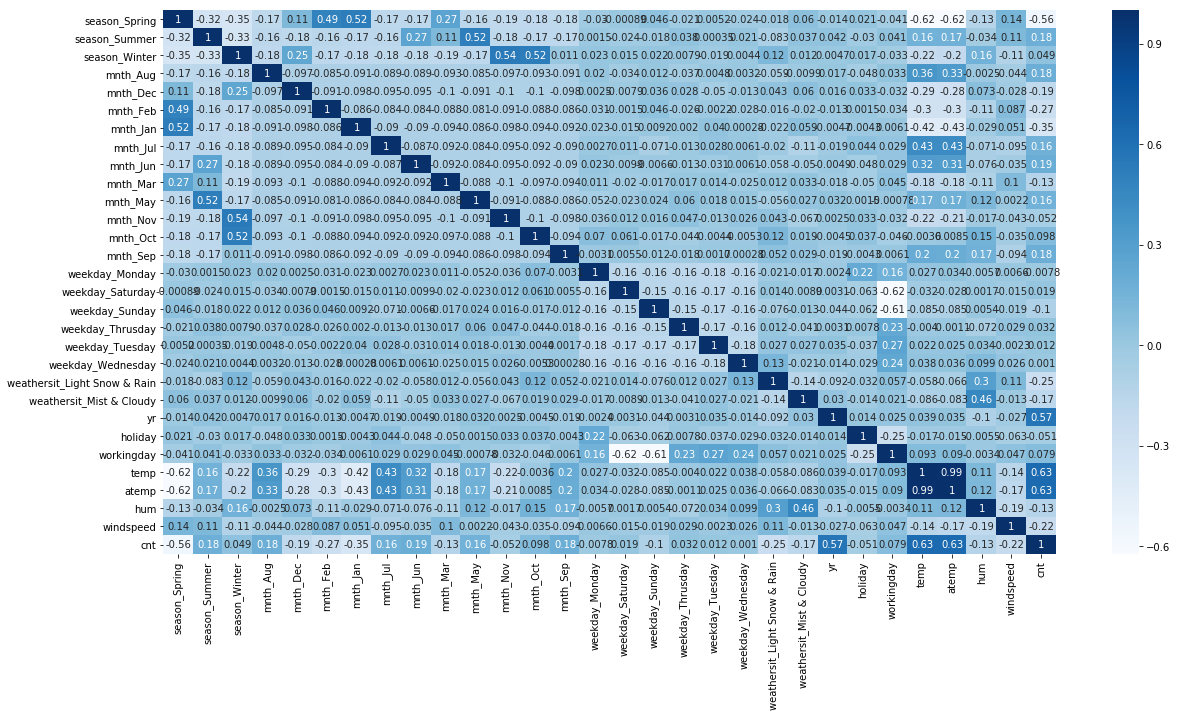

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="Blues")
plt.show()

In [30]:
## Dividing into X_train and y_train sets for the model building
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

In [31]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', False, 11),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 14),
 ('mnth_Jan', False, 15),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [33]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

In [35]:
# Adding a constant variable 
 
X_train_sm = sm.add_constant(X_train_rfe)


In [36]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_sm).fit()

In [37]:
# Check the parameters obtained

lm.params

const                           0.363533
season_Spring                  -0.101619
season_Winter                   0.086568
mnth_Dec                       -0.050571
mnth_Jul                       -0.056673
mnth_May                        0.045680
mnth_Nov                       -0.066128
mnth_Sep                        0.055809
weathersit_Light Snow & Rain   -0.200659
weathersit_Mist & Cloudy       -0.054929
yr                              0.234388
holiday                        -0.078822
temp                            0.287308
atemp                           0.166411
hum                            -0.186943
windspeed                      -0.114591
dtype: float64

In [38]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-187
Time:                        01:06:11   Log-Likelihood:                 508.55
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Model 2

In [39]:
### dropping 'atemp' from the model
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [40]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [41]:
## Fit the model
lm = sm.OLS(y_train,X_train_lm).fit()

In [42]:
# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.10e-188
Time:                        01:06:11   Log-Likelihood:                 507.70
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     495   BIC:                            -921.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3695      0.031     11.904      0.000       0.309       0.431
season_Spring                   -0.1019      0.016     -6.418      0.000      -0.133      -0.071
season_Winter                    0.0879      0.014      6.172      0.000       0.060       0.116
mnth_Dec                        -0.0506      0.016     -3.210      0.001      -0.082      -0.020
mnth_Jul                        -0.0556      0.017     -3.201      0.001      -0.090      -0.021
mnth_May                         0.0470      0.017      2.790      0.005       0.014       0.080
mnth_Nov                        -0.0662      0.018     -3.685      0.000      -0.102      -0.031
mnth_Sep                         0.0551      0.016      3.520      0.000       0.024       0.086
weathersit_Light Snow & Rain    -0.2029      0.025     -8.251      0.000      -0.251      -0.155
weathersit_Mist & Cloudy        -0.0552      0.011     -5.250      0.000      -0.076      -0.035
yr                               0.2341      0.008     28.623      0.000       0.218       0.250
holiday                         -0.0791      0.026     -3.084      0.002      -0.129      -0.029
temp                             0.4349      0.030     14.517      0.000       0.376       0.494
hum                             -0.1846      0.038     -4.822      0.000      -0.260      -0.109
windspeed                       -0.1189      0.021     -5.628      0.000      -0.160      -0.077
==============================================================================
Omnibus:                       74.733   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.231
Skew:                          -0.684   Prob(JB):                     4.54e-50
Kurtosis:                       5.971   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,hum,23.37
11,temp,13.90
13,windspeed,4.09
1,season_Winter,3.14
0,season_Spring,3.00
8,weathersit_Mist & Cloudy,2.22
9,yr,1.99
5,mnth_Nov,1.82
3,mnth_Jul,1.50
2,mnth_Dec,1.43


## Model 3

In [44]:
## dropping 'mnth_May' from the model
X_train_new = X_train_new.drop(['mnth_May'], axis=1)

In [45]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [46]:
## Fit the model
lm = sm.OLS(y_train,X_train_lm).fit()

In [47]:
## Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.78e-188
Time:                        01:06:12   Log-Likelihood:                 503.72
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     496   BIC:                            -920.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3682      0.031     11.782      0.000       0.307       0.430
season_Spring                   -0.1118      0.016     -7.173      0.000      -0.142      -0.081
season_Winter                    0.0785      0.014      5.635      0.000       0.051       0.106
mnth_Dec                        -0.0520      0.016     -3.275      0.001      -0.083      -0.021
mnth_Jul                        -0.0645      0.017     -3.753      0.000      -0.098      -0.031
mnth_Nov                        -0.0673      0.018     -3.718      0.000      -0.103      -0.032
mnth_Sep                         0.0469      0.015      3.030      0.003       0.016       0.077
weathersit_Light Snow & Rain    -0.2091      0.025     -8.484      0.000      -0.258      -0.161
weathersit_Mist & Cloudy        -0.0575      0.011     -5.446      0.000      -0.078      -0.037
yr                               0.2351      0.008     28.582      0.000       0.219       0.251
holiday                         -0.0775      0.026     -3.000      0.003      -0.128      -0.027
temp                             0.4324      0.030     14.344      0.000       0.373       0.492
hum                             -0.1653      0.038     -4.359      0.000      -0.240      -0.091
windspeed                       -0.1175      0.021     -5.525      0.000      -0.159      -0.076
==============================================================================
Omnibus:                       76.211   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.667
Skew:                          -0.715   Prob(JB):                     1.99e-48
Kurtosis:                       5.880   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,22.19
10,temp,13.88
12,windspeed,4.09
1,season_Winter,2.95
0,season_Spring,2.79
7,weathersit_Mist & Cloudy,2.20
8,yr,1.98
4,mnth_Nov,1.82
3,mnth_Jul,1.45
2,mnth_Dec,1.43


## Model 4

In [49]:
### dropping 'mnth_Sep' from the model
X_train_new = X_train_new.drop(['mnth_Sep'], axis=1)

In [50]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Fit the model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [51]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.21e-187
Time:                        01:06:12   Log-Likelihood:                 499.05
No. Observations:                 510   AIC:                            -972.1
Df Residuals:                     497   BIC:                            -917.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,22.05
9,temp,13.75
11,windspeed,4.05
1,season_Winter,2.94
0,season_Spring,2.78
6,weathersit_Mist & Cloudy,2.20
7,yr,1.98
4,mnth_Nov,1.79
2,mnth_Dec,1.42
3,mnth_Jul,1.41


## Model 5

In [53]:
### dropping 'holiday' from the model
X_train_new = X_train_new.drop(['holiday'], axis=1)

In [54]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Fit the model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [55]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.92e-186
Time:                        01:06:13   Log-Likelihood:                 494.66
No. Observations:                 510   AIC:                            -965.3
Df Residuals:                     498   BIC:                            -914.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [56]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,hum,22.02
8,temp,13.75
10,windspeed,4.04
1,season_Winter,2.94
0,season_Spring,2.77
6,weathersit_Mist & Cloudy,2.20
7,yr,1.98
4,mnth_Nov,1.79
2,mnth_Dec,1.42
3,mnth_Jul,1.40


## Model 6

In [57]:
### dropping hum from the model as it has very high VIF
X_train_new = X_train_new.drop(['hum'], axis=1)

In [58]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Fit the model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [59]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.17e-184
Time:                        01:06:13   Log-Likelihood:                 486.29
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     499   BIC:                            -904.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [60]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.18
9,windspeed,3.99
1,season_Winter,2.45
7,yr,1.98
4,mnth_Nov,1.75
0,season_Spring,1.74
6,weathersit_Mist & Cloudy,1.56
2,mnth_Dec,1.37
3,mnth_Jul,1.35
5,weathersit_Light Snow & Rain,1.10


In [61]:
## Check parameter coefficient
lm.params

const                           0.277249
season_Spring                  -0.119238
season_Winter                   0.071833
mnth_Dec                       -0.061203
mnth_Jul                       -0.067213
mnth_Nov                       -0.073599
weathersit_Light Snow & Rain   -0.250532
weathersit_Mist & Cloudy       -0.082273
yr                              0.238922
temp                            0.415195
windspeed                      -0.097173
dtype: float64

## Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

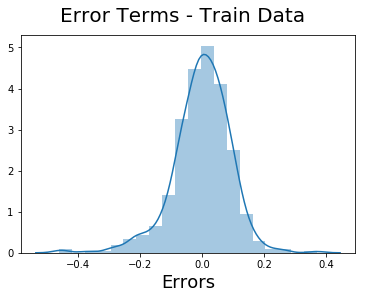

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms - Train Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

Text(0, 0.5, 'y predicted')

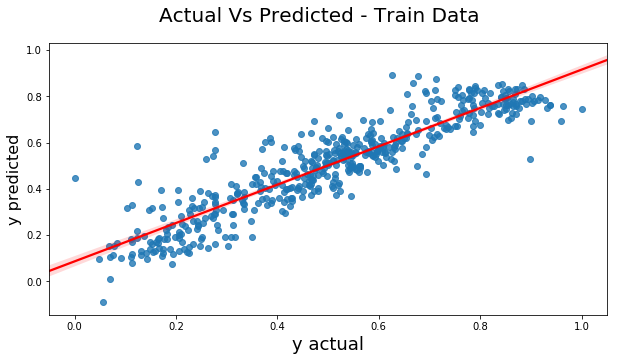

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
sns.regplot(x=y_train, y=y_train_pred, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('Actual Vs Predicted - Train Data', fontsize = 20)              # Plot heading 
plt.xlabel('y actual', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16) 


## Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

In [65]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [66]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.237443,0.296804,0.200913,0.091324,0.063927,0.082192,0.086758,0.095890,0.086758,0.077626,...,0.009132,0.305936,0.511416,0.036530,0.616438,0.547916,0.523530,0.629939,0.395522,0.535483
std,0.426491,0.457896,0.401601,0.288730,0.245183,0.275286,0.282125,0.295115,0.282125,0.268194,...,0.095344,0.461858,0.501015,0.188034,0.487367,0.240049,0.216250,0.147360,0.206915,0.215590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.049680,-0.026641,0.193231,-0.052405,0.047055
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.349516,0.346192,0.519923,0.256105,0.390474
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.563760,0.546542,0.628535,0.371475,0.533709
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.762504,0.708229,0.750214,0.499177,0.698746
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.016608,0.951509,0.948586,1.224196,0.981707


In [67]:
## Dividing into X_test and y_test
y_test = test.pop('cnt')
X_test = test

In [68]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [69]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 637 to 550
Data columns (total 11 columns):
const                           219 non-null float64
season_Spring                   219 non-null uint8
season_Winter                   219 non-null uint8
mnth_Dec                        219 non-null uint8
mnth_Jul                        219 non-null uint8
mnth_Nov                        219 non-null uint8
weathersit_Light Snow & Rain    219 non-null uint8
weathersit_Mist & Cloudy        219 non-null uint8
yr                              219 non-null int64
temp                            219 non-null float64
windspeed                       219 non-null float64
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [70]:
# Making predictions using the model 6

y_pred = lm.predict(X_test)

In [71]:
## R^2 Value for TEST
r2_score(y_test, y_pred)

0.8133684806387846

In [72]:
## Calculate mse for the model
mse = mean_squared_error(y_test, y_pred)
mse

0.008634860086968189

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y predicted')

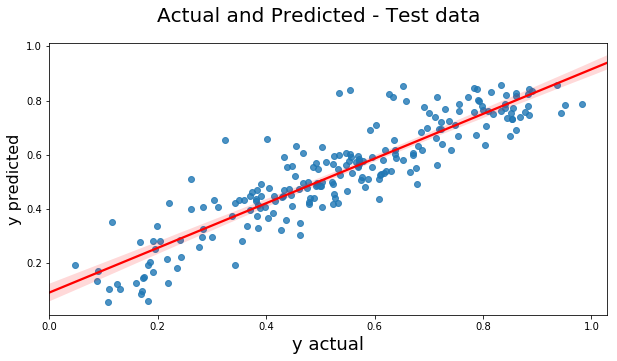

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('Actual and Predicted - Test data', fontsize = 20)              # Plot heading 
plt.xlabel('y actual', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16) 

Text(0, 0.5, 'Counts')

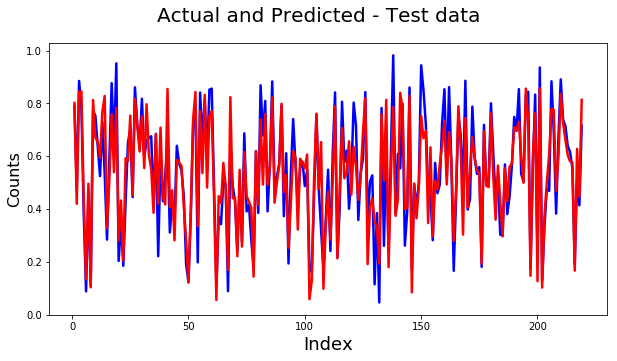

In [74]:
## Line chart for actual and predicted values
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted - Test data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16) 

Text(0.5, 0, 'Errors')

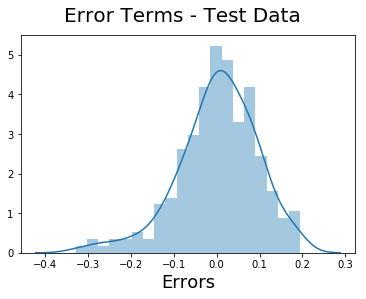

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms - Test Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         

In [76]:
## Parameter and coefficient values
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
9,temp,0.415195
0,const,0.277249
8,yr,0.238922
2,season_Winter,0.071833
3,mnth_Dec,-0.061203
4,mnth_Jul,-0.067213
5,mnth_Nov,-0.073599
7,weathersit_Mist & Cloudy,-0.082273
10,windspeed,-0.097173


### Insights
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

##### Final Model Interpretation
###### Hypothesis Testing:
Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0


From the Model 6 param summary, it is evident that all our coefficients are not equal to zero, which means <b>We REJECT the NULL HYPOTHESIS</b>
###### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
- F-statistic: 241.7
- Prob (F-statistic): 4.17e-184
##### The F-Statistics value of 241 (which is greater than 1) and the p-value of '~0.000' states that the overall model is significant
##### The equation of best fitted surface based on model 6:¶
cnt = 0.277249 + (temp X 0.415195) + (yr X 0.238922) + (season_Winter X 0.071833)  − (windspeed X 0.097173) + (season_Spring X 0.119238) - (mnth_Dec X 0.061203) - (mnth_Jul X 0.067213) - (mnth_Nov X 0.073599) − (weathersit_Light Snow & Rain X 0.250532) − (weathersit_Mist & Cloudy X 0.082273)


- All the positive coefficients like `temp`, `season_Winter` and `yr` indicate that an increase in these values will lead to an increase in the value of `cnt`.
- All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of `cnt`.

- Temp is the most significant with the largest coefficient.
- Followed by `yr` and `season_Winter`.
- Bike rentals is more for the month of september.
- The rentals reduce due to increase in `windspeed`.